![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




Carguen la base de datos preparada desde la fase 2.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('data_normalizada.csv')

# Mostrar las primeras 5 filas del DataFrame
dataset.head()


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,BIOPSIA_ADENOCARCINOMA GLEASON 10,BIOPSIA_ADENOCARCINOMA GLEASON 6,BIOPSIA_ADENOCARCINOMA GLEASON 6,BIOPSIA_ADENOCARCINOMA GLEASON 7,BIOPSIA_ADENOCARCINOMA GLEASON 7,BIOPSIA_ADENOCARCINOMA GLEASON 8,BIOPSIA_ADENOCARCINOMA GLEASON 9,BIOPSIA_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS,BIOPSIA_HIPERPLASIA PROSTATICA,BIOPSIA_NEG,BIOPSIA_PROSTATITIS,HOSPITALIZACION
0,53.0,0.0,0.0,4.0,0.0,1.0,1.0,0.0,False,False,False,False,False,False,False,False,False,True,False,1.0
1,56.0,0.0,0.0,7.7,0.0,1.0,1.0,0.0,False,False,False,False,False,False,False,False,False,True,False,1.0
2,57.0,0.0,0.0,29.0,1.0,1.0,1.0,0.0,False,False,False,False,False,False,False,False,False,True,False,1.0
3,56.0,0.0,0.0,7.0,0.0,1.0,1.0,0.0,False,False,False,False,False,False,False,False,False,True,False,1.0
4,55.0,0.0,0.0,29.0,1.0,1.0,1.0,0.0,False,False,False,False,False,False,False,False,False,True,False,1.0


Separen el dataset en X, y (variable objetivo)

In [3]:
X = dataset.iloc[:, :-1] # Todas las filas y todas las columnas excepto la última, por que la última tiene la variable objetivo, osea Hospitalización
y = dataset.iloc[:, -1] # Todas las filas y solo la última columna es decir la etiqueta Hospitalización

Separen el dataset en X_train, X_test, y_train y y_test

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123) # Se realiza la separación para el train y el test

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(426, 19) (426,) (142, 19) (142,)


Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Instanciamos un objeto de la clase DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 5, random_state = 42) 

# Entrenamos el modelo
clf.fit(X_train,y_train) # X_train, y_train

# Predecimos
y_pred = clf.predict(X_test)

# Evaluamos aplicando la métrica
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))


1.0


Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización. 

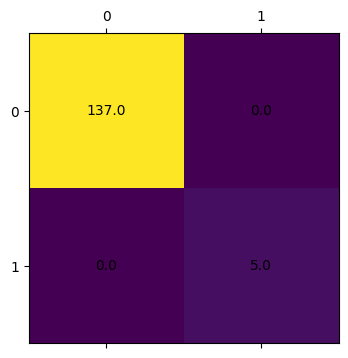

In [6]:
# Generar la matriz de confisión
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
cm_display = ConfusionMatrixDisplay(matrix)

fig, ax = plt.subplots(figsize=(4,5))

ax.matshow(matrix)
for (i, j), z in np.ndenumerate(matrix):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()



In [7]:
matrix

# Muestra un resultado favorable, 137 casos que el modelo predijo correctamente, y cero casos el cual modelo predijo incorrectamente

array([[137,   0],
       [  0,   5]], dtype=int64)

Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

In [8]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# 1. Exactitud (Accuracy)
# Siendo una medida general del rendimiento del modelo y se calcula como el número de predicciones correctas dividido por el número total de predicciones, indicando
# qué tan bien el modelo clasifica correctamente las muestras en todas las clases. Una alta exactitud significa que el modelo clasifica correctamente la mayoría de 
# las muestras.

exactitud = accuracy_score(y_test, y_pred)

# 2. Sensibilidad (Recall)
# También conocida como tasa positiva verdadera, mide la proporción de casos positivos reales que se identificaron correctamente, se calcula como el número de 
# verdaderos positivos dividido por la suma de verdaderos positivos y falsos negativos La sensibilidad es importante cuando el costo de los falsos negativos es alto.
sensibilidad = recall_score(y_test, y_pred)

# 3. Especificidad (Specificity)
# También conocida como tasa negativa verdadera, mide la proporción de casos negativos reales que se identificaron correctamente, se calcula como el número de verdaderos 
# negativos dividido por la suma de verdaderos negativos y falsos positivos. La especificidad es importante cuando el costo de los falsos positivos es alto 
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
especificidad = tn / (tn + fp)

print("Exactitud:", exactitud)
print("Sensibilidad:", sensibilidad)
print("Especificidad:", especificidad)

Exactitud: 1.0
Sensibilidad: 1.0
Especificidad: 1.0


Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

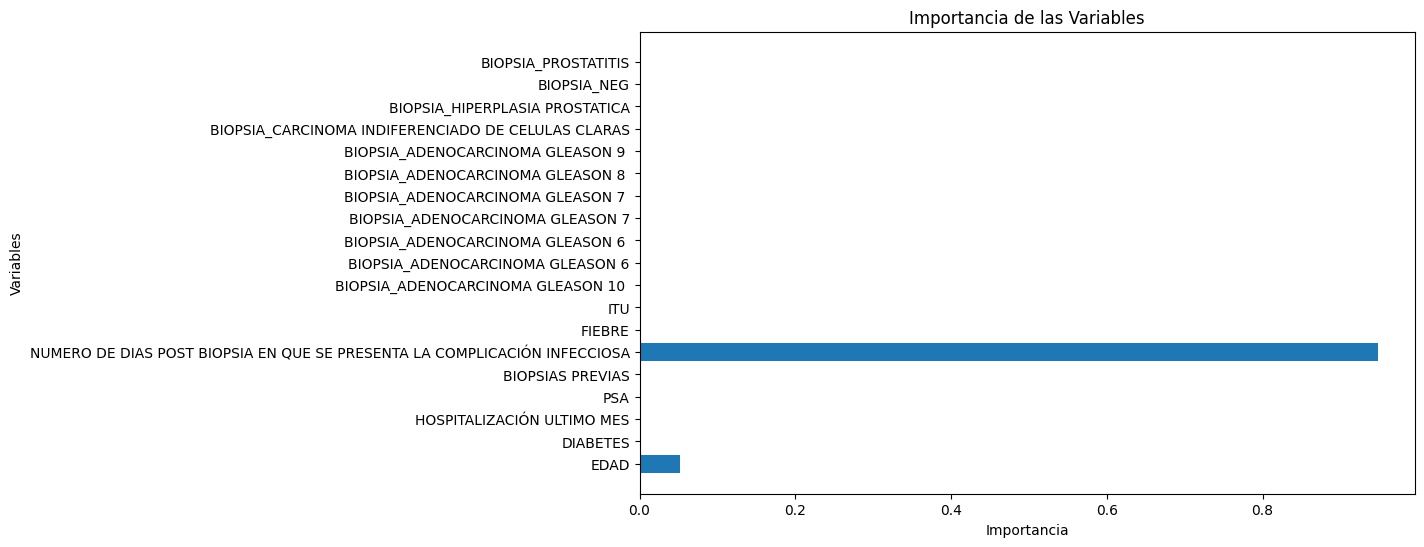

In [9]:
# Para visualizar la importancia de cada variable en la clasificación utilizando el atributo feature_importances_ del modelo de árbol de decisión.

import matplotlib.pyplot as plt

# Obtener la importancia de cada variable
importancias = clf.feature_importances_

# Obtener el nombre de las variables
nombres_variables = X_train.columns

# Crear un gráfico de barras para visualizar la importancia de cada variable
plt.figure(figsize=(10, 6))
plt.barh(nombres_variables, importancias)
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las Variables')
plt.show()

Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

In [10]:
# Para encontrar un valor óptimo para el hiperparámetro max_depth, puedes utilizar la validación cruzada

from sklearn.model_selection import GridSearchCV

# Definir los parámetros para la búsqueda en cuadrícula
parametros = {'max_depth': [3, 5, 7, 10]}

# Instanciar el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(clf, parametros, cv=5, scoring='accuracy')

# Entrenar el modelo con la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Obtener el mejor valor para max_depth
mejor_max_depth = grid_search.best_params_['max_depth']
print("Mejor valor para max_depth:", mejor_max_depth)

# Se genera nuevamente el modelo de árbol de desición con este nuevo valor, para comparar las metricas de evaluacion con el arterior entrenamiento.

# Construir un nuevo modelo con el mejor valor para max_depth
clf_optimo = DecisionTreeClassifier(max_depth=mejor_max_depth, random_state=42)

# Entrenar el modelo
clf_optimo.fit(X_train, y_train)

# Predecir sobre los datos de prueba
y_pred_optimo = clf_optimo.predict(X_test)

# Calcular las métricas de evaluación
exactitud_optimo = accuracy_score(y_test, y_pred_optimo)
sensibilidad_optimo = recall_score(y_test, y_pred_optimo)
especificidad_optimo = (tn / (tn + fp))

print("Exactitud con max_depth óptimo:", exactitud_optimo)
print("Sensibilidad con max_depth óptimo:", sensibilidad_optimo)
print("Especificidad con max_depth óptimo:", especificidad_optimo) 

Mejor valor para max_depth: 3
Exactitud con max_depth óptimo: 1.0
Sensibilidad con max_depth óptimo: 1.0
Especificidad con max_depth óptimo: 1.0


Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# instanciar modelo de k-vecinos
k_arbitrario = 5  # Por ejemplo, k=5
knn_modelo = KNeighborsClassifier(n_neighbors=k_arbitrario)

# Entrenar el modelo
knn_modelo.fit(X_train, y_train)

# Predecir sobre los datos de prueba
y_pred_knn = knn_modelo.predict(X_test)

# Calcular la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred_knn)
print("Exactitud del modelo:", exactitud)

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_knn))

# Calcular y mostrar la matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_knn))


Exactitud del modelo: 0.971830985915493

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       137
         1.0       0.67      0.40      0.50         5

    accuracy                           0.97       142
   macro avg       0.82      0.70      0.74       142
weighted avg       0.97      0.97      0.97       142


Matriz de Confusión:
[[136   1]
 [  3   2]]


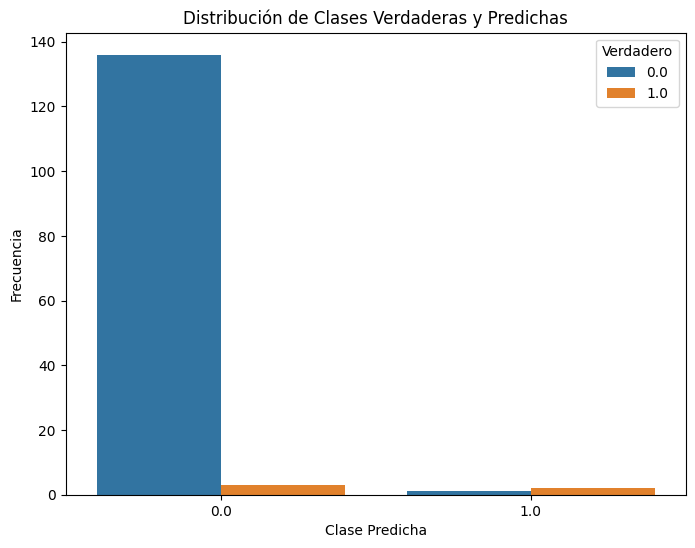

In [12]:
# Visualicemos los resultados de la predicción

import seaborn as sns

# Crear un DataFrame con las etiquetas verdaderas y predichas
df_pred = pd.DataFrame({'Verdadero': y_test, 'Predicho': y_pred_knn})

# Graficar la distribución de las clases
plt.figure(figsize=(8, 6))
sns.countplot(data=df_pred, x='Predicho', hue='Verdadero')
plt.title('Distribución de Clases Verdaderas y Predichas')
plt.xlabel('Clase Predicha')
plt.ylabel('Frecuencia')
plt.legend(title='Verdadero')
plt.show()

Encuentre el valor óptimo para k

In [13]:
# Para encontrar el valor óptimo de k en el modelo de k-vecinos más cercanos (KNN), se utiliza la validación cruzada junto con la búsqueda en cuadrícula

from sklearn.model_selection import GridSearchCV

# Definir la lista de valores para k que deseas probar
parametros = {'n_neighbors': [3, 5, 7, 9, 11]} 

# Instanciar el modelo KNN
knn = KNeighborsClassifier()

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(knn, parametros, cv=5, scoring='accuracy')

# Entrenar el modelo con la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Obtener el mejor valor para k
mejor_k = grid_search.best_params_['n_neighbors']
print("Mejor valor para k:", mejor_k)


Mejor valor para k: 3


In [14]:
# Evaluaremos nuevamente el modelo con k=3, el cual se considera el valor optimo y comparar

# instanciar modelo de k-vecinos
k_arbitrario = 3  # k=3, que es el valor óptimo
knn_modelo = KNeighborsClassifier(n_neighbors=k_arbitrario)

# Entrenar el modelo
knn_modelo.fit(X_train, y_train)

# Predecir sobre los datos de prueba
y_pred_knn = knn_modelo.predict(X_test)

# Calcular la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred_knn)
print("Exactitud del modelo:", exactitud)

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_knn))

# Calcular y mostrar la matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_knn))


Exactitud del modelo: 0.9647887323943662

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       137
         1.0       0.50      0.40      0.44         5

    accuracy                           0.96       142
   macro avg       0.74      0.69      0.71       142
weighted avg       0.96      0.96      0.96       142


Matriz de Confusión:
[[135   2]
 [  3   2]]


In [ ]:
""" En la comparación de los resultados de los modelos KNN con k=5 y k=3, podemos observar algunas diferencias en las métricas de evaluación:

Exactitud del modelo:

Con k=5: La exactitud del modelo es del 97.18%.
Con k=3: La exactitud del modelo es del 96.48%.

Reporte de clasificación:

Con k=5: El modelo tiene una precisión del 98% para la clase 0 y del 67% para la clase 1. La sensibilidad (recall) es del 99% para la clase 0 y del 40% para la clase 1.
Con k=3: El modelo tiene una precisión del 98% para la clase 0 y del 50% para la clase 1. La sensibilidad (recall) es del 99% para la clase 0 y del 40% para la clase 1.

Matriz de confusión:

Con k=5: La matriz de confusión muestra que el modelo clasificó correctamente la mayoría de las instancias de ambas clases, pero hubo 3 falsos positivos y 3 falsos negativos.
Con k=3: La matriz de confusión muestra resultados similares, con 2 falsos positivos y 3 falsos negativos.

Al comparar estos resultados, podemos observar que el modelo con k=5 tiene una leve ventaja en términos de exactitud y precisión para la clase 1, mientras que el modelo 
con k=3 tiene una precisión ligeramente más baja pero un rendimiento similar en términos de sensibilidad y la matriz de confusión. En general, la diferencia en el 
rendimiento entre los dos modelos es bastante pequeña, lo que sugiere que ambos valores de k podrían ser adecuados """

Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Calcular la exactitud del modelo de KNN
exactitud_knn = accuracy_score(y_test, y_pred_knn)

# Mostrar el reporte de clasificación del modelo de KNN
reporte_knn = classification_report(y_test, y_pred_knn)

# Calcular y mostrar la matriz de confusión del modelo de KNN
matriz_confusion_knn = confusion_matrix(y_test, y_pred_knn)

# Instanciar el modelo de árbol de decisión con el valor óptimo de max_depth
arbol_optimizado = DecisionTreeClassifier(max_depth=mejor_max_depth, random_state=42)

# Entrenar el modelo de árbol de decisión optimizado
arbol_optimizado.fit(X_train, y_train)

# Realizar predicciones sobre los datos de prueba
y_pred_arbol = arbol_optimizado.predict(X_test)

# Calcular la exactitud del modelo de árbol de decisión optimizado
exactitud_arbol = accuracy_score(y_test, y_pred_arbol)

# Calcular la exactitud del modelo de árbol de decisión optimizado
exactitud_arbol = accuracy_score(y_test, y_pred_arbol)

# Mostrar el reporte de clasificación del modelo de árbol de decisión optimizado
reporte_arbol = classification_report(y_test, y_pred_arbol)

# Calcular y mostrar la matriz de confusión del modelo de árbol de decisión optimizado
matriz_confusion_arbol = confusion_matrix(y_test, y_pred_arbol)

# Comparar los valores de las métricas entre los dos modelos
print("Comparación de métricas entre KNN y Árbol de Decisión:")
print("\nExactitud:")
print("KNN:", exactitud_knn)
print("Árbol de Decisión:", exactitud_arbol)

print("\nReporte de Clasificación (KNN):\n", reporte_knn)
print("\nReporte de Clasificación (Árbol de Decisión):\n", reporte_arbol)

print("\nMatriz de Confusión (KNN):\n", matriz_confusion_knn)
print("\nMatriz de Confusión (Árbol de Decisión):\n", matriz_confusion_arbol)


Comparación de métricas entre KNN y Árbol de Decisión:

Exactitud:
KNN: 0.9647887323943662
Árbol de Decisión: 1.0

Reporte de Clasificación (KNN):
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       137
         1.0       0.50      0.40      0.44         5

    accuracy                           0.96       142
   macro avg       0.74      0.69      0.71       142
weighted avg       0.96      0.96      0.96       142


Reporte de Clasificación (Árbol de Decisión):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       137
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142


Matriz de Confusión (KNN):
 [[135   2]
 [  3   2]]

Matriz de Confusión (Árbol de Decisión):
 [[137   0]
 [  0   5]]


In [ ]:
""" Se relacionan las siguientes observaciones:

Exactitud:

KNN: 0.965
Árbol de Decisión: 1.0
La exactitud mide la proporción de predicciones correctas del modelo. El modelo de árbol de decisión tiene una exactitud perfecta (1.0), lo que significa que 
clasifica correctamente todos los casos en el conjunto de datos de prueba. Por otro lado, el modelo KNN tiene una exactitud ligeramente menor, pero sigue siendo 
alta (0.965), lo que indica que también tiene un buen rendimiento en la clasificación.

Reporte de Clasificación:

Ambos modelos tienen un alto valor de precisión, recall y puntuación F1 para ambas clases (0 y 1). Esto indica que ambos modelos son capaces de clasificar correctamente
la mayoría de las instancias de ambas clases. Sin embargo, el modelo de árbol de decisión tiene un rendimiento perfecto en todas las métricas, mientras que el modelo 
KNN tiene valores ligeramente más bajos, especialmente para la clase 1. Esto sugiere que el modelo de árbol de decisión puede ser más robusto y generalizable en este 
conjunto de datos específico.

Matriz de Confusión:

La matriz de confusión del modelo de árbol de decisión muestra que clasifica correctamente todas las instancias de ambas clases (137 verdaderos positivos y 5 
verdaderos negativos). Esto confirma la exactitud perfecta del modelo.

La matriz de confusión del modelo KNN muestra algunos falsos negativos para la clase 1, lo que indica que el modelo KNN tiende a subestimar la predicción de esta clase.

En conclusión el modelo de árbol de decisión parece tener un rendimiento superior al modelo KNN en este conjunto de datos específico, especialmente en términos de 
exactitud y capacidad para clasificar correctamente las instancias de ambas clases """

De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

R/ 
Usar técnicas de ensamblaje como bagging, boosting o ensamblaje de modelos para combinar múltiples modelos base y mejorar la generalización y la robustez del modelo final.

Utilizar técnicas de validación cruzada para evaluar el rendimiento del modelo de manera más robusta y evitar el sobreajuste. Esto puede ayudar a seleccionar el mejor modelo y evitar la filtración de datos.